# Before embarking on Pandas 

- Before we learn about dataframes, we need to quickly learn about lambda functions
- Lambda functions are a nice feature of Python as they allow you a way to write a function that you'll only really use once.
- `lambda variable: expression`
- A good cheatsheet from Stata to python can be found here:
    - https://cheatsheets.quantecon.org/stats-cheatsheet.html

In [23]:
sum_func = lambda x: x+1

sum_func(3)

4

-  As we'll see in a bit, we can use lambda functions to make new variables in a pandas dataframe.
- Only in this case, the `x` would refer to an observation in a variable.
    - It will make more sense in a bit.

## Pandas 

- Pandas is a data library for Python, which is based on the idea of "dataframes" 
- You can think of a dataframe as a souped up dictionary or list
- As in, a pandas dataframe has methods that are statistics specific
    - Calling a subset yields another dataframe
    - means, variances, sums
    - data merging
    - checking and filling in missing values
    - plotting data
    - Creating more "columns" using already existing columns

## What is a dataframe?

- A Pandas dataframe is made up of: columns, rows and an index
- column = variable
- row = obervation
- index is how we count the observations
    - we can use indexes in more complicated ways later
    - Foreshadowing: panel data
        - Household, year data
- A "vector" of data is called a pandas "Series"
    - It's still part of pandas, but doesn't have exactly the same capabilities
    - A full dataframe is made up of many series put together
    

In [1]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt

## Loading Data

- Pandas allows loading in different data types:
    - csv, xlsx, dta, sas
    - as well as more memory efficient and big data files like feathers and arrows

In [28]:
## Load in raw_data
raw_df = pd.read_csv("https://raw.githubusercontent.com/lordflaron/ARE106data/master/lawsch85.csv")
raw_df

# pd.read_csv
# pd.read_sas
# pd.read_stata
# pd.read_html
# pd.read_feather/ pd.read_hdf5/ pd.read_parquet



,Unnamed: 0,rank,salary,cost,LSAT,GPA,libvol,faculty,age,clsize,north,south,east,west,studfac,top10,r11_25,r26_40,r41_60
0,0,128,31400.0,8340.0,155.0,3.15,216.0,45.0,12.0,210.0,1,0,0,0,4.666667,0,0,0,0
1,1,104,33098.0,6980.0,160.0,3.50,256.0,44.0,113.0,190.0,0,1,0,0,4.318182,0,0,0,0
2,2,34,32870.0,16370.0,155.0,3.25,424.0,78.0,134.0,270.0,0,0,1,0,3.461539,0,0,1,0
3,3,49,35000.0,17566.0,157.0,3.20,329.0,136.0,89.0,277.0,0,0,1,0,2.036765,0,0,0,1
4,4,95,33606.0,8350.0,162.0,3.38,332.0,56.0,70.0,150.0,0,0,0,1,2.678571,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,151,17,49321.0,13530.0,162.0,3.34,300.0,50.0,206.0,178.0,0,0,1,0,3.560000,0,1,0,0
152,152,21,49900.0,11334.0,161.0,3.40,NaN,47.0,NaN,285.0,1,0,0,0,6.063830,0,1,0,0
153,153,143,31500.0,7396.0,157.0,3.40,174.0,17.0,65.0,79.0,0,0,0,1,4.647059,0,0,0,0
154,154,3,69000.0,19780.0,171.0,3.82,850.0,100.0,140.0,101.0,0,0,1,0,1.010000,1,0,0,0


## The Columns and the Index

- In Pandas, there are columns and an index. 
- The columns are names for variables and the index names the rows
- The index right now is just a range of numbers
    - But you can make *another* variable your index and on multiple dimensions
    - So you can index your data by say, household and time, 
    - particularly useful for panel regression

In [10]:
raw_df.columns


Index(['Unnamed: 0', 'rank', 'salary', 'cost', 'LSAT', 'GPA', 'libvol',
       'faculty', 'age', 'clsize', 'north', 'south', 'east', 'west', 'studfac',
       'top10', 'r11_25', 'r26_40', 'r41_60'],
      dtype='object')

In [8]:
raw_df.index


RangeIndex(start=0, stop=156, step=1)

- To get just a snippet of data, we can use the `head()` and `tail()` methods
    - `head()` gets us the first observations
    - `tail()` get us the last observations
    - The default is 5, but can we change that by using the `n` option

In [12]:
raw_df.head(n=10)


,Unnamed: 0,rank,salary,cost,LSAT,GPA,libvol,faculty,age,clsize,north,south,east,west,studfac,top10,r11_25,r26_40,r41_60
0,0,128,31400.0,8340.0,155.0,3.15,216.0,45.0,12.0,210.0,1,0,0,0,4.666667,0,0,0,0
1,1,104,33098.0,6980.0,160.0,3.50,256.0,44.0,113.0,190.0,0,1,0,0,4.318182,0,0,0,0
2,2,34,32870.0,16370.0,155.0,3.25,424.0,78.0,134.0,270.0,0,0,1,0,3.461539,0,0,1,0
3,3,49,35000.0,17566.0,157.0,3.20,329.0,136.0,89.0,277.0,0,0,1,0,2.036765,0,0,0,1
4,4,95,33606.0,8350.0,162.0,3.38,332.0,56.0,70.0,150.0,0,0,0,1,2.678571,0,0,0,0
5,5,98,31700.0,8350.0,161.0,3.40,311.0,40.0,29.0,156.0,0,0,0,1,3.900000,0,0,0,0
6,6,124,30410.0,6020.0,155.0,3.16,220.0,40.0,61.0,151.0,0,1,0,0,3.775000,0,0,0,0
7,7,157,30150.0,5986.0,152.0,3.12,230.0,45.0,60.0,149.0,0,1,0,0,3.311111,0,0,0,0
8,8,145,31300.0,4785.0,155.0,3.12,230.0,101.0,70.0,322.0,0,0,1,0,3.188119,0,0,0,0
9,9,91,33200.0,7680.0,160.0,3.66,157.0,44.0,128.0,70.0,0,1,0,0,1.590909,0,0,0,0


In [13]:
raw_df.tail(n=10)

,Unnamed: 0,rank,salary,cost,LSAT,GPA,libvol,faculty,age,clsize,north,south,east,west,studfac,top10,r11_25,r26_40,r41_60
146,146,67,35000.0,6700.0,158.0,3.35,415.0,66.0,58.0,234.0,1,0,0,0,3.545455,0,0,0,0
147,147,135,27900.0,11775.0,153.0,3.08,301.0,59.0,NaN,251.0,0,0,1,0,4.254237,0,0,0,0
148,148,156,29630.0,15960.0,155.0,3.00,230.0,40.0,10.0,247.0,0,0,0,1,6.175000,0,0,0,0
149,149,138,29750.0,14200.0,154.0,3.10,481.0,206.0,NaN,679.0,0,0,1,0,3.296117,0,0,0,0
150,150,66,36000.0,12800.0,157.0,3.20,244.0,39.0,102.0,182.0,0,0,1,0,4.666667,0,0,0,0
151,151,17,49321.0,13530.0,162.0,3.34,300.0,50.0,206.0,178.0,0,0,1,0,3.560000,0,1,0,0
152,152,21,49900.0,11334.0,161.0,3.40,NaN,47.0,NaN,285.0,1,0,0,0,6.063830,0,1,0,0
153,153,143,31500.0,7396.0,157.0,3.40,174.0,17.0,65.0,79.0,0,0,0,1,4.647059,0,0,0,0
154,154,3,69000.0,19780.0,171.0,3.82,850.0,100.0,140.0,101.0,0,0,1,0,1.010000,1,0,0,0
155,155,120,29800.0,12870.0,NaN,NaN,200.0,35.0,NaN,327.0,1,0,0,0,9.342857,0,0,0,0


- To get a look at just one variable, you can do it one of two ways:
    - `raw_df.variable`
    - `raw_df['variable']`
        - Sort of like a dictionary!
    - if there are spaces in the variable name (there usually shouldn't be though), use the second
    


In [18]:
raw_df['salary']

0      31400.0
1      33098.0
2      32870.0
3      35000.0
4      33606.0
        ...   
151    49321.0
152    49900.0
153    31500.0
154    69000.0
155    29800.0
Name: salary, Length: 156, dtype: float64

In [19]:
raw_df['salary'].head()

0    31400.0
1    33098.0
2    32870.0
3    35000.0
4    33606.0
Name: salary, dtype: float64

- If you wanted to get just some variables (a subset), you can use a sort of slicing notation



In [20]:
subset = ['salary', 'GPA']
raw_df[subset].head()

,salary,GPA
0,31400.0,3.15
1,33098.0,3.50
2,32870.0,3.25
3,35000.0,3.20
4,33606.0,3.38


In [22]:
raw_df[['salary', 'GPA']].describe()

,salary,GPA
count,148.000000,149.000000
mean,38946.716216,3.302752
std,12188.840435,0.199776
min,24900.000000,2.730000
25%,29950.000000,3.200000
50%,34725.000000,3.300000
75%,41350.000000,3.410000
max,78325.000000,3.820000


## Assigning a new column (variable)

- Now let's think about how to make a new variable
- Sometimes we might need to do that
    - Like in the homework, for example
- How would we do the $1000*x$ operation in `pandas`?
- Note: remember about *inplace* operations
- assigning a new variable won't actually change the raw data itself

In [38]:
raw_df.assign(salary_times_thousand = lambda x: x['salary']*1000, inplace=True)

# df = raw_df.copy(deep=True)
# df['salary_times_thousand'] = df['salary']*1000
# df
# raw_df
df = (
    raw_df
    .assign(salary_times_thousand = lambda df: df['salary']*1000)
    )


In [39]:
raw_df['salary_times_thousand']


KeyError: 'salary_times_thousand'

In [51]:
df = (
    raw_df
    .assign(salary_times_thousand = lambda x: x['salary']*1000,
            gpa_ten  = lambda dfdfd: dfdfd['GPA']*10,
            gpa_salary = lambda df: df['gpa_ten']*df['salary'])
    # .mean()
    )

df

,Unnamed: 0,rank,salary,cost,LSAT,GPA,libvol,faculty,age,clsize,...,east,west,studfac,top10,r11_25,r26_40,r41_60,salary_times_thousand,gpa_ten,gpa_salary
0,0,128,31400.0,8340.0,155.0,3.15,216.0,45.0,12.0,210.0,...,0,0,4.666667,0,0,0,0,31400000.0,31.5,989100.0
1,1,104,33098.0,6980.0,160.0,3.50,256.0,44.0,113.0,190.0,...,0,0,4.318182,0,0,0,0,33098000.0,35.0,1158430.0
2,2,34,32870.0,16370.0,155.0,3.25,424.0,78.0,134.0,270.0,...,1,0,3.461539,0,0,1,0,32870000.0,32.5,1068275.0
3,3,49,35000.0,17566.0,157.0,3.20,329.0,136.0,89.0,277.0,...,1,0,2.036765,0,0,0,1,35000000.0,32.0,1120000.0
4,4,95,33606.0,8350.0,162.0,3.38,332.0,56.0,70.0,150.0,...,0,1,2.678571,0,0,0,0,33606000.0,33.8,1135882.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,151,17,49321.0,13530.0,162.0,3.34,300.0,50.0,206.0,178.0,...,1,0,3.560000,0,1,0,0,49321000.0,33.4,1647321.4
152,152,21,49900.0,11334.0,161.0,3.40,NaN,47.0,NaN,285.0,...,0,0,6.063830,0,1,0,0,49900000.0,34.0,1696600.0
153,153,143,31500.0,7396.0,157.0,3.40,174.0,17.0,65.0,79.0,...,0,1,4.647059,0,0,0,0,31500000.0,34.0,1071000.0
154,154,3,69000.0,19780.0,171.0,3.82,850.0,100.0,140.0,101.0,...,1,0,1.010000,1,0,0,0,69000000.0,38.2,2635800.0


## Dropping Variables

- In pandas, we can drop by the index, or drop a column

In [57]:
## Drop by index

df.drop(index=0)

# Drop by column

df.drop(columns = ['rank', 'Unnamed: 0'])

## Remember that this is not an inplace operation...


,salary,cost,LSAT,GPA,libvol,faculty,age,clsize,north,south,east,west,studfac,top10,r11_25,r26_40,r41_60,salary_times_thousand,gpa_ten,gpa_salary
0,31400.0,8340.0,155.0,3.15,216.0,45.0,12.0,210.0,1,0,0,0,4.666667,0,0,0,0,31400000.0,31.5,989100.0
1,33098.0,6980.0,160.0,3.50,256.0,44.0,113.0,190.0,0,1,0,0,4.318182,0,0,0,0,33098000.0,35.0,1158430.0
2,32870.0,16370.0,155.0,3.25,424.0,78.0,134.0,270.0,0,0,1,0,3.461539,0,0,1,0,32870000.0,32.5,1068275.0
3,35000.0,17566.0,157.0,3.20,329.0,136.0,89.0,277.0,0,0,1,0,2.036765,0,0,0,1,35000000.0,32.0,1120000.0
4,33606.0,8350.0,162.0,3.38,332.0,56.0,70.0,150.0,0,0,0,1,2.678571,0,0,0,0,33606000.0,33.8,1135882.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,49321.0,13530.0,162.0,3.34,300.0,50.0,206.0,178.0,0,0,1,0,3.560000,0,1,0,0,49321000.0,33.4,1647321.4
152,49900.0,11334.0,161.0,3.40,NaN,47.0,NaN,285.0,1,0,0,0,6.063830,0,1,0,0,49900000.0,34.0,1696600.0
153,31500.0,7396.0,157.0,3.40,174.0,17.0,65.0,79.0,0,0,0,1,4.647059,0,0,0,0,31500000.0,34.0,1071000.0
154,69000.0,19780.0,171.0,3.82,850.0,100.0,140.0,101.0,0,0,1,0,1.010000,1,0,0,0,69000000.0,38.2,2635800.0


## Getting Unique Values and Value Counts

- similar to `tab` in Stata

In [65]:
df[['north', 'south', 'west', 'east']].idxmax(axis='columns')

0      north
1      south
2       east
3       east
4       west
       ...  
151     east
152    north
153     west
154     east
155    north
Length: 156, dtype: object

In [66]:
# Get unique and nunique values
(
    df
    .assign(area = lambda x: x[['north', 'south', 'east', 'west']].idxmax(axis=1))
    ['area']
    .unique()
    ) # ignore the middle part for now

array(['north', 'south', 'east', 'west'], dtype=object)

In [70]:
df['salary'].unique()

array([31400., 33098., 32870., 35000., 33606., 31700., 30410., 30150.,
       31300., 33200., 34900., 55413., 33750., 65000.,    nan, 62000.,
       63000., 28500., 30100., 33650., 40325., 70000., 32800., 78325.,
       67500., 29800., 28900., 42300., 32900., 29200., 34500., 32300.,
       60172., 32093., 46103., 33900., 64880., 29336., 61000., 62705.,
       45889., 34130., 34400., 67815., 30580., 51082., 39000., 29500.,
       27000., 40000., 50000., 31000., 26000., 30000., 36000., 33000.,
       29750., 34750., 29640., 28420., 39500., 38000., 42000., 39900.,
       49862., 40591., 36900., 34000., 34700., 56200., 28800., 28000.,
       67000., 53177., 29699., 41300., 34800., 24900., 30135., 37600.,
       39800., 29700., 41000., 38750., 29650., 52000., 30050., 29000.,
       41150., 29499., 59500., 35500., 29799., 29600., 25000., 49000.,
       57000., 29669., 37000., 64000., 51490., 41500., 27900., 29630.,
       49321., 49900., 31500., 69000.])

In [71]:
# Get nunique
df['rank'].nunique()

154

In [75]:
# get value counts
df['area'].value_counts()

KeyError: 'area'

## Dealing with Missing Values

In [78]:
# Pandas uses NaN as a marker for missing values
df_with_missing = df.assign(bad_variable = lambda x: np.random.choice([1, 0, np.nan], size=x.shape[0]))

df_with_missing.bad_variable


0      0.0
1      0.0
2      1.0
3      1.0
4      NaN
      ... 
151    NaN
152    1.0
153    NaN
154    NaN
155    NaN
Name: bad_variable, Length: 156, dtype: float64

- You can drop missing values
- fill them with something else

In [84]:
print(df_with_missing.shape)
print(df_with_missing.dropna(how='all').shape)

print(df_with_missing.dropna( how='any').shape)

print(df_with_missing.dropna( how='any', axis=0).shape)

print(df_with_missing.dropna( how='any', axis=1).shape)

print(df_with_missing.dropna(subset=['bad_variable']).shape)

(156, 23)
(156, 23)
(58, 23)
(58, 23)
(156, 10)
(100, 23)


In [86]:
df_with_missing['bad_variable'].value_counts(dropna=False)

NaN    56
0.0    51
1.0    49
Name: bad_variable, dtype: int64

In [87]:
(
    df_with_missing
    .fillna({'bad_variable' : 0})
    ['bad_variable']
    .value_counts(dropna=False)
    )

0.0    107
1.0     49
Name: bad_variable, dtype: int64

In [88]:
df_with_missing['bad_variable'].fillna(0)

0      0.0
1      0.0
2      1.0
3      1.0
4      0.0
      ... 
151    0.0
152    1.0
153    0.0
154    0.0
155    0.0
Name: bad_variable, Length: 156, dtype: float64

In [90]:
(
    df_with_missing
    .fillna({'bad_variable' : df_with_missing['LSAT']})
    ['bad_variable']
    .value_counts(dropna=False)
    )

0.0      51
1.0      49
160.0     8
154.0     6
155.0     6
156.0     4
162.0     4
163.0     3
NaN       3
152.0     3
161.0     3
159.0     3
164.0     2
158.0     2
157.0     2
153.0     2
168.0     1
169.0     1
165.0     1
145.0     1
171.0     1
Name: bad_variable, dtype: int64

## Index and MultiIndex in pandas

- In pandas you can index the rows of a dataframe by a variable. 
- This is great when you have hierarchical data
    - This can also be done for columns


In [46]:
# create a household-year panel
multi_index = pd.MultiIndex.from_product([range(10), range(2002, 2020)], names = ['hhid', 'year'])

hh_panel = pd.DataFrame(index=multi_index, columns = ['income', 'poverty'], 
             data = np.array([np.random.uniform(0,100,size=180), np.random.choice([0,1], size=180)]).T).reset_index()

In [47]:
hh_panel

,hhid,year,income,poverty
0,0,2002,76.310149,0.0
1,0,2003,69.320458,0.0
2,0,2004,37.194886,0.0
3,0,2005,29.264823,1.0
4,0,2006,87.412667,0.0
...,...,...,...,...
175,9,2015,10.907087,1.0
176,9,2016,17.339980,0.0
177,9,2017,40.005931,0.0
178,9,2018,53.948514,1.0


In [48]:
hh_panel.set_index(['hhid', 'year'])

income  poverty
hhid year                    
0    2002  76.310149      0.0
     2003  69.320458      0.0
     2004  37.194886      0.0
     2005  29.264823      1.0
     2006  87.412667      0.0
...              ...      ...
9    2015  10.907087      1.0
     2016  17.339980      0.0
     2017  40.005931      0.0
     2018  53.948514      1.0
     2019   9.300263      0.0

[180 rows x 2 columns]

In [49]:
hh_panel.set_index('hhid').set_index('year', append=True)

income  poverty
hhid year                    
0    2002  76.310149      0.0
     2003  69.320458      0.0
     2004  37.194886      0.0
     2005  29.264823      1.0
     2006  87.412667      0.0
...              ...      ...
9    2015  10.907087      1.0
     2016  17.339980      0.0
     2017  40.005931      0.0
     2018  53.948514      1.0
     2019   9.300263      0.0

[180 rows x 2 columns]

## Stacking and Unstacking

- Stacking and unstacking are a way to create wide data (similar to `reshape`)
- There's also `pivot`, but `unstack` usually all you need.

In [50]:
hh_panel.set_index(['hhid', 'year']).unstack() #by default, level=1
unstacked_hh_panel = hh_panel.set_index(['hhid', 'year']).unstack(level=0)
unstacked_hh_panel

income                                                         \
hhid          0          1          2          3          4          5   
year                                                                     
2002  76.310149  52.847478  88.609039  10.712928  85.175245  22.147009   
2003  69.320458   7.539270  86.611393  45.119163  56.061995   4.627151   
2004  37.194886  15.563911  53.288154  82.339430  32.500915  25.670957   
2005  29.264823  76.664612   6.392260  88.533415  79.244732  63.387244   
2006  87.412667  14.642093  45.938671  49.430793  14.690645  46.110900   
2007  31.885483  54.944872  39.087980  74.480067  22.511769   1.083997   
2008  74.399107   7.600468  33.185236  19.266057  27.466555  83.935622   
2009  99.202455  58.029980  97.482143  73.338038  40.251657  45.031173   
2010  58.645733  52.050400  38.322206  35.536926  48.108598  69.592564   
2011  61.826248  20.343278  86.576510  33.870969  27.639936  69.597823   
2012   5.560756  46.403698  27.253976  57.043359  44.178675  73.383225   
2013  39.235501  95.092436  11.148023  56.567043  77.259519  27.968972   
2014  83.134166  46.613143  79.119842  84.157608  78.189728  65.493720   
2015  68.721585  27.519294   5.580631  69.792603  38.275990  90.940997   
2016  89.108430  68.177777  48.893386  42.061661  77.893846  14.366945   
2017  85.184763  64.915803  58.138105  87.459766  72.923854   9.442346   
2018   2.569662  50.356380  47.675325  62.781321  21.785058  69.299528   
2019  98.983901  84.017599  14.311781  13.819787  59.207991  26.792172   

                                                 poverty                      \
hhid          6          7          8          9       0    1    2    3    4   
year                                                                           
2002  18.388761  25.418923  71.025048  79.921372     0.0  0.0  0.0  0.0  0.0   
2003  31.954924  56.993572  85.572721  95.342317     0.0  0.0  0.0  1.0  0.0   
2004  89.584083  12.746719  84.046002  24.223823     0.0  1.0  1.0  0.0  1.0   
2005  54.706956  44.889921  32.952991  80.833992     1.0  0.0  0.0  0.0  1.0   
2006   3.189936  33.147060  91.965274  27.572347     0.0  0.0  0.0  1.0  1.0   
2007  28.231601  81.702570  10.141662  84.374523     0.0  1.0  1.0  0.0  0.0   
2008   5.352774  95.274569  13.230568  76.999332     1.0  1.0  1.0  1.0  1.0   
2009   9.412725   8.675538  40.844192  32.507839     0.0  1.0  1.0  1.0  0.0   
2010  73.166238  50.653967  96.056621  87.786531     1.0  0.0  0.0  0.0  1.0   
2011  36.162638  69.506383  39.372652  56.431256     1.0  0.0  1.0  1.0  1.0   
2012  34.908010  33.842191  50.224441  61.176451     1.0  0.0  0.0  0.0  0.0   
2013  80.191956  39.465679  36.875737  10.416859     0.0  1.0  0.0  0.0  0.0   
2014  55.904164  91.911811  65.169658  12.877477     1.0  0.0  0.0  1.0  0.0   
2015  36.887287  37.270241  83.115066  10.907087     0.0  1.0  1.0  1.0  0.0   
2016  21.953517  81.852805  96.430958  17.339980     1.0  0.0  0.0  1.0  0.0   
2017  31.790671  32.002826   7.702848  40.005931     0.0  0.0  0.0  0.0  0.0   
2018  24.605614  28.886709  26.881034  53.948514     0.0  1.0  0.0  1.0  1.0   
2019  30.139251  89.921281  49.213969   9.300263     1.0  0.0  1.0  1.0  1.0   

                               
hhid    5    6    7    8    9  
year                           
2002  1.0  0.0  1.0  1.0  0.0  
2003  1.0  1.0  0.0  0.0  1.0  
2004  1.0  1.0  0.0  1.0  0.0  
2005  0.0  1.0  1.0  1.0  0.0  
2006  0.0  0.0  1.0  0.0  0.0  
2007  1.0  1.0  0.0  0.0  1.0  
2008  1.0  1.0  1.0  0.0  0.0  
2009  1.0  0.0  1.0  0.0  0.0  
2010  1.0  1.0  1.0  1.0  1.0  
2011  0.0  0.0  1.0  1.0  0.0  
2012  1.0  0.0  0.0  1.0  0.0  
2013  0.0  0.0  0.0  1.0  1.0  
2014  1.0  0.0  0.0  1.0  1.0  
2015  0.0  1.0  1.0  0.0  1.0  
2016  0.0  1.0  0.0  0.0  0.0  
2017  1.0  1.0  1.0  1.0  0.0  
2018  0.0  1.0  1.0  0.0  1.0  
2019  0.0  1.0  1.0  0.0  0.0

- Now the columns are also a multiindex!
- To get get an observation from a multiindex, we use `loc`


In [51]:
unstacked_hh_panel.loc[2002, 'income']

hhid
0    76.310149
1    52.847478
2    88.609039
3    10.712928
4    85.175245
5    22.147009
6    18.388761
7    25.418923
8    71.025048
9    79.921372
Name: 2002, dtype: float64

In [52]:
unstacked_hh_panel.loc[2002, ('income', 1)]

52.84747836380169

## Querying Data and Making Subsets

-  Creating subsets of data is something you will constantly need to do in data analysis
- There are many ways to do it in pandas, but the easiest way is `query`

In [53]:
# get the second observation
hh_panel.iloc[1]

# Get everything but the last observation
hh_panel.iloc[:-1]

# get only data after 2006
hh_panel.loc[lambda x: x['income']>50]


,hhid,year,income,poverty
0,0,2002,76.310149,0.0
1,0,2003,69.320458,0.0
4,0,2006,87.412667,0.0
6,0,2008,74.399107,1.0
7,0,2009,99.202455,0.0
...,...,...,...,...
168,9,2008,76.999332,0.0
170,9,2010,87.786531,1.0
171,9,2011,56.431256,0.0
172,9,2012,61.176451,0.0


-  But with query, thing are a lot easier and it lets us write out expressions much more easily and faster!

In [54]:
hh_panel.query("income > 50 and poverty == 1 and year ==2005 and hhid != 4")

,hhid,year,income,poverty
111,6,2005,54.706956,1.0


## Apply and Transform

- If we need to manipulate data somehow, we can use `apply`
- Note that this depends on the axis argument.
    - By default, pandas works on each *row*, taking it as a vector (axis=0)

In [55]:
hh_panel.apply(lambda x: x*1000)

hh_panel.apply(lambda x: x['income']*1000, axis=1)

hh_panel.assign(thousand_rank = lambda df: df['income'].apply(lambda x: x*1000)) # same as just df['income']*1000


,hhid,year,income,poverty,thousand_rank
0,0,2002,76.310149,0.0,76310.148566
1,0,2003,69.320458,0.0,69320.458117
2,0,2004,37.194886,0.0,37194.885556
3,0,2005,29.264823,1.0,29264.823339
4,0,2006,87.412667,0.0,87412.667026
...,...,...,...,...,...
175,9,2015,10.907087,1.0,10907.087213
176,9,2016,17.339980,0.0,17339.979853
177,9,2017,40.005931,0.0,40005.931313
178,9,2018,53.948514,1.0,53948.513842


# Groupby and grouping data

- Let's say you wanted to group data by household, and get statistics

In [56]:
hh_panel.groupby('hhid')

In [57]:
hh_panel.groupby('hhid')[['income', 'poverty']].mean()

,income,poverty
hhid,,
0,60.997821,0.444444
1,46.851249,0.388889
2,48.200815,0.388889
3,54.795052,0.555556
4,50.187039,0.444444
5,44.937353,0.555556
6,37.029506,0.611111
7,50.786820,0.611111
8,54.490080,0.500000


In [58]:
hh_panel.groupby('year')[['income', 'poverty']].mean()

,income,poverty
year,,
2002,53.055595,0.3
2003,53.914297,0.4
2004,45.715888,0.6
2005,55.687094,0.5
2006,41.410039,0.3
2007,42.844452,0.5
2008,43.671029,0.8
2009,50.477574,0.5
2010,60.991978,0.7


In [59]:
hh_panel.groupby('year')[['income', 'poverty']].agg(['mean', 'std', 'median'])

income                       poverty                 
           mean        std     median    mean       std median
year                                                          
2002  53.055595  30.903120  61.936263     0.3  0.483046    0.0
2003  53.914297  31.934856  56.527783     0.4  0.516398    0.0
2004  45.715888  29.625999  34.847900     0.6  0.516398    1.0
2005  55.687094  26.932125  59.047100     0.5  0.527046    0.5
2006  41.410039  29.683509  39.542866     0.3  0.483046    0.0
2007  42.844452  29.733079  35.486732     0.5  0.527046    0.5
2008  43.671029  34.965520  30.325896     0.8  0.421637    1.0
2009  50.477574  31.879741  42.937682     0.5  0.527046    0.5
2010  60.991978  20.248048  55.348067     0.7  0.483046    1.0
2011  50.132769  21.673107  47.901954     0.6  0.516398    1.0
2012  43.397478  19.187110  45.291187     0.3  0.483046    0.0
2013  47.422173  29.107841  39.350590     0.3  0.483046    0.0
2014  66.257132  23.370169  71.841724     0.5  0.527046    0.5
2015  46.901078  29.621961  37.773115     0.6  0.516398    1.0
2016  55.807930  31.016699  58.535581     0.3  0.483046    0.0
2017  48.956691  29.123990  49.072018     0.4  0.516398    0.0
2018  38.878914  21.058181  38.281017     0.6  0.516398    1.0
2019  47.570800  33.909850  39.676610     0.6  0.516398    1.0

- Groupby lets you break up the data into groups and manipulate what's happening
- You can also use apply in that situation, but note that groupby will take each group as a vector!

In [60]:
hh_panel.groupby('hhid').ngroups

10

In [61]:
hh_panel.groupby('hhid').apply(lambda x: x - x.mean())

,hhid,year,income,poverty
0,0.0,-8.5,15.312328,-0.444444
1,0.0,-7.5,8.322637,-0.444444
2,0.0,-6.5,-23.802935,-0.444444
3,0.0,-5.5,-31.732997,0.555556
4,0.0,-4.5,26.414846,-0.444444
...,...,...,...,...
175,0.0,4.5,-36.979907,0.611111
176,0.0,5.5,-30.547014,-0.388889
177,0.0,6.5,-7.881063,-0.388889
178,0.0,7.5,6.061520,0.611111


In [62]:
# You can also get group specific statistics, but cast back to the original data
hh_panel.groupby('hhid')[['income', 'poverty']].transform('mean')

# you can do this to create new variables
hh_panel.assign(hhid_income_mean = lambda df: df.groupby('hhid')['income'].transform('mean'))

,hhid,year,income,poverty,hhid_income_mean
0,0,2002,76.310149,0.0,60.997821
1,0,2003,69.320458,0.0,60.997821
2,0,2004,37.194886,0.0,60.997821
3,0,2005,29.264823,1.0,60.997821
4,0,2006,87.412667,0.0,60.997821
...,...,...,...,...,...
175,9,2015,10.907087,1.0,47.886994
176,9,2016,17.339980,0.0,47.886994
177,9,2017,40.005931,0.0,47.886994
178,9,2018,53.948514,1.0,47.886994


## Piping and Using Functions

-  Everything we just discussed can also be used with functions
- apply, transform, agg...
- If your operation can't be done readably in a one-line lambda function, this is usually a good idea.
- Note that you should know what the function should be taking in as input
    - an apply will take a vector/series as input
    - pipe should take a dataframe

In [63]:
def add_n(x, n=1):
    return x + n

In [64]:
def weighted_mean(x, weights):
    return np.sum(x*weights)/np.sum(weights)


In [65]:
(
    hh_panel
    .assign(weights = np.random.uniform(size=180))
    .apply(add_n, 1)
    )

,hhid,year,income,poverty,weights
0,1.0,2003.0,77.310149,1.0,1.168566
1,1.0,2004.0,70.320458,1.0,1.226509
2,1.0,2005.0,38.194886,1.0,1.713281
3,1.0,2006.0,30.264823,2.0,1.842607
4,1.0,2007.0,88.412667,1.0,1.213867
...,...,...,...,...,...
175,10.0,2016.0,11.907087,2.0,1.875841
176,10.0,2017.0,18.339980,1.0,1.533814
177,10.0,2018.0,41.005931,1.0,1.468846
178,10.0,2019.0,54.948514,2.0,1.677433


In [66]:
(
    hh_panel
    .assign(weights = np.random.uniform(size=180))
    .groupby('hhid')
    .apply(lambda x: weighted_mean(x['income'], x['weights']))
    )



hhid
0    53.017975
1    48.088215
2    41.646559
3    58.780994
4    52.310658
5    41.766115
6    34.957078
7    56.291443
8    51.361858
9    55.921856
dtype: float64

- similar to R's piping `%>%`, pandas has a function called `pipe`. 
- You can pipe in any function, but the first argument should be for a dataframe

In [67]:
def pipe_func(df, n):
    return df['income'] + 1

In [68]:
hh_panel.pipe(pipe_func, 22)

0      77.310149
1      70.320458
2      38.194886
3      30.264823
4      88.412667
         ...    
175    11.907087
176    18.339980
177    41.005931
178    54.948514
179    10.300263
Name: income, Length: 180, dtype: float64

## Date Variables

- Pandas handles dates pretty well and allows accessing parts of a date pretty easily.
- You can load in data and specify which columns are meant to be datetime (the pandas date type)

In [69]:
# create a dataset with time periods
data = io.StringIO("""
date,x1,x2,year,month,day
2022-10-01,0,1,2021,10,1
2022-01-23,1,2,2021,1,23
2022-05-23,2,3,2021,5,23
""")


# df_date = pd.read_csv(data, parse_dates={'date_2' : ['year', 'month', 'day']})
df_date = pd.read_csv(data, parse_dates=['date'])


df_date

,date,x1,x2,year,month,day
0,2022-10-01,0,1,2021,10,1
1,2022-01-23,1,2,2021,1,23
2,2022-05-23,2,3,2021,5,23


In [70]:
df_date.date

0   2022-10-01
1   2022-01-23
2   2022-05-23
Name: date, dtype: datetime64[ns]

In [71]:
df_date.date - pd.to_datetime('2022-01-22')

0   252 days
1     1 days
2   121 days
Name: date, dtype: timedelta64[ns]

## Exporting Data

- `pandas` can export to many different file formats
- dta, csv, xlsx, (and more memory efficient formats for big data)
- It can also export to different table formats as well:
    - latex and markdown
- `df.to_csv(<path>)`, `df.to_stata(<path>)`, `df.to_excel(<path>)`
- `df.to_latex(<path>, <other_options>)`, `df.to_markdown(<path>, <other_options>)`

## More Tips and Tricks

These exercises will have you explore some topics that we didn't cover in the lecture:

- lagging a variable
- using where and mask
- changing time frequency
- astype

### Lagging a Variable

- Similar to `l.` in Stata.


In [75]:
hh_panel.assign(lagged_income = lambda df: df['income'].shift(1),
                lead_income = lambda df: df['income'].shift(-1))

,hhid,year,income,poverty,lagged_income,lead_income
0,0,2002,76.310149,0.0,NaN,69.320458
1,0,2003,69.320458,0.0,76.310149,37.194886
2,0,2004,37.194886,0.0,69.320458,29.264823
3,0,2005,29.264823,1.0,37.194886,87.412667
4,0,2006,87.412667,0.0,29.264823,31.885483
...,...,...,...,...,...,...
175,9,2015,10.907087,1.0,12.877477,17.339980
176,9,2016,17.339980,0.0,10.907087,40.005931
177,9,2017,40.005931,0.0,17.339980,53.948514
178,9,2018,53.948514,1.0,40.005931,9.300263


In [106]:
# what if we wanted to do it by household?
hh_panel.assign(
    lag_income = lambda df: df.groupby('hhid')['income'].shift(1)
)[['hhid', 'year','lag_income']].set_index(['hhid', 'year']).unstack(0)

lag_income                                                         \
hhid          0          1          2          3          4          5   
year                                                                     
2002        NaN        NaN        NaN        NaN        NaN        NaN   
2003  76.310149  52.847478  88.609039  10.712928  85.175245  22.147009   
2004  69.320458   7.539270  86.611393  45.119163  56.061995   4.627151   
2005  37.194886  15.563911  53.288154  82.339430  32.500915  25.670957   
2006  29.264823  76.664612   6.392260  88.533415  79.244732  63.387244   
2007  87.412667  14.642093  45.938671  49.430793  14.690645  46.110900   
2008  31.885483  54.944872  39.087980  74.480067  22.511769   1.083997   
2009  74.399107   7.600468  33.185236  19.266057  27.466555  83.935622   
2010  99.202455  58.029980  97.482143  73.338038  40.251657  45.031173   
2011  58.645733  52.050400  38.322206  35.536926  48.108598  69.592564   
2012  61.826248  20.343278  86.576510  33.870969  27.639936  69.597823   
2013   5.560756  46.403698  27.253976  57.043359  44.178675  73.383225   
2014  39.235501  95.092436  11.148023  56.567043  77.259519  27.968972   
2015  83.134166  46.613143  79.119842  84.157608  78.189728  65.493720   
2016  68.721585  27.519294   5.580631  69.792603  38.275990  90.940997   
2017  89.108430  68.177777  48.893386  42.061661  77.893846  14.366945   
2018  85.184763  64.915803  58.138105  87.459766  72.923854   9.442346   
2019   2.569662  50.356380  47.675325  62.781321  21.785058  69.299528   

                                                  
hhid          6          7          8          9  
year                                              
2002        NaN        NaN        NaN        NaN  
2003  18.388761  25.418923  71.025048  79.921372  
2004  31.954924  56.993572  85.572721  95.342317  
2005  89.584083  12.746719  84.046002  24.223823  
2006  54.706956  44.889921  32.952991  80.833992  
2007   3.189936  33.147060  91.965274  27.572347  
2008  28.231601  81.702570  10.141662  84.374523  
2009   5.352774  95.274569  13.230568  76.999332  
2010   9.412725   8.675538  40.844192  32.507839  
2011  73.166238  50.653967  96.056621  87.786531  
2012  36.162638  69.506383  39.372652  56.431256  
2013  34.908010  33.842191  50.224441  61.176451  
2014  80.191956  39.465679  36.875737  10.416859  
2015  55.904164  91.911811  65.169658  12.877477  
2016  36.887287  37.270241  83.115066  10.907087  
2017  21.953517  81.852805  96.430958  17.339980  
2018  31.790671  32.002826   7.702848  40.005931  
2019  24.605614  28.886709  26.881034  53.948514

### Where and Mask

- Sometimes you want to create change rows based on a binary condition
- use `mask`, `where` or `np.where`

In [115]:
hh_panel.assign(income_new = lambda df: df['income'].where(lambda x: x>20, 0))

hh_panel.assign(income_new = lambda df: df['income'].mask(lambda x: x>20, 0))

hh_panel.assign(income_new = lambda df: np.where(df['income']>20, 0, 1))

,hhid,year,income,poverty,income_new
0,0,2002,76.310149,0.0,0
1,0,2003,69.320458,0.0,0
2,0,2004,37.194886,0.0,0
3,0,2005,29.264823,1.0,0
4,0,2006,87.412667,0.0,0
...,...,...,...,...,...
175,9,2015,10.907087,1.0,1
176,9,2016,17.339980,0.0,1
177,9,2017,40.005931,0.0,0
178,9,2018,53.948514,1.0,0


## Changing Time Frequency

- Sometimes you have time data, but you want to change its frequency
- Change daily data to weekly, monthly, etc
- For this we can use `resample`

<AxesSubplot:>

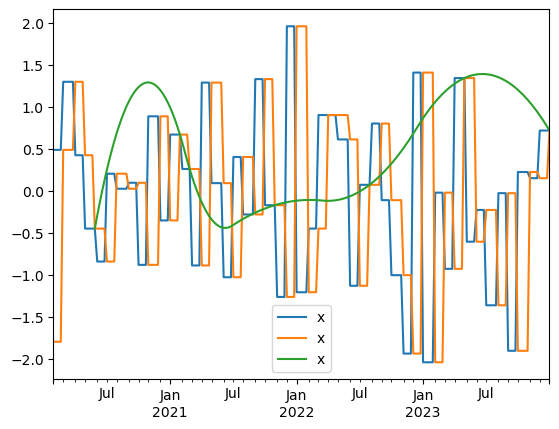

In [172]:
# create some time data
ts_data = pd.date_range("2020-01-01", "2023-12-31", freq='M')

ts_df = pd.DataFrame(
    index = ts_data,
    columns = ['x'],
    data=np.random.normal(size=len(ts_data))
    )

ts_df.resample('Y').mean()

fig, ax = plt.subplots()

ts_df.resample("W").bfill().plot(ax=ax)
ts_df.resample("W").ffill().plot(ax=ax)
ts_df.resample("W").interpolate('quadratic', order=12).plot(ax=ax)


### Changing Type  

- Sometimes you might want to change the type of a variable, like say changing a string of numbers to floats or integers, so you can use mathematical operations
- It's really as easy as `astype`

In [175]:
num_string_df = pd.DataFrame(
    columns= ['x'],
    data = ['1', '2', '3', '4']
)

num_string_df

,x
0,1
1,2
2,3
3,4


In [177]:
num_string_df.dtypes
# A string!

x    object
dtype: object

In [181]:
num_string_df['x']*2

0    11
1    22
2    33
3    44
Name: x, dtype: object

In [182]:
num_string_df['x'] + 1

TypeError: can only concatenate str (not "int") to str

In [187]:
num_string_df.assign(x_int = lambda df: df['x'].astype(int))['x_int'] + 1



0    2
1    3
2    4
3    5
Name: x_int, dtype: int64

## Recap

- We looked at different ways to use `pandas`
- In terms of data analysis, `pandas` is the main library to use
- You're not expected to memorize these functions or how to use them
- The most important thing to learn to do
    - Learn how to read errors
    - `KeyError`, `ValueError`, `TypeError`
    - Python shows you where the code broke
    - Check why things are not working
    - If you still can't figure it out, use slack
- **Learn to read documentation**
    - read the user guide: https://pandas.pydata.org/docs/user_guide/index.html
    - Read the API (fancy name for library function documentation)
        - https://pandas.pydata.org/docs/reference/index.html
- For those coming from R, stata or SAS:
    - https://pandas.pydata.org/docs/getting_started/index.html#coming-from


## Short Project Description

- Due Sep. 21 11:59pm
- A good time to spend thinking about your final project 
- Opportunity to get feedback on the idea and to think about feasibility/ time
- Even if we didn't cover a topic you're interested in, write an idea around it and I'll guide you on its feasibility.
- Come to office hours or slack me before due date and I can explain what we will do
- Or ask now!

From Canvas: 

> Please submit your empirical project's 1-page description (in text or PDF format) via Canvas. Please use a 12-point font and 1-inch margins. In your description, please address the following points:

1. What is the research question? Clearly and succinctly articulate the precise question your research project intends to answer. Please state this as a question (with a question mark) to clarify exactly what you are trying to answer.

2. What are the context, relevance, and motivation? Provide a short discussion of why you think this question is important. What are you interested in this? Why should others be interested in this question? Understanding why something is relevant generally requires some understanding of the context of a particular literature, so please provide some limited background if that helps you better articulate your motivation.

3. What datasets are needed? Provide a list of the dataset you have identified that you think you will be using in the project. It is fine if you don’t have settled on these yet. Providing a sense of what the dataset is for is also important. If we haven't covered a topic for data extraction yet, but you would like to use it, write it down and I'll comment on its feasibility.

4. What is your methodology or identification strategy? Provide an overview of the methods you will be using to answer the research question. Are you estimating a regression model?  If so, what is your identification strategy? Are you training a machine learning model? If so, tell me what you will be predicting. Are you running an optimization model or is your study mainly descriptive in nature?

5. What is your progress status and your goal for this class project? How far are you into this project? Have you made considerable progress? If so, please describe this and what you need to move forward. Also, be explicit about what you hope to achieve for this project in the course and the presentation context.
